# MATH 210 Introduction to Mathematical Computing

**April 2, 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Data Fitting

Create a fake dataset using random number generators.

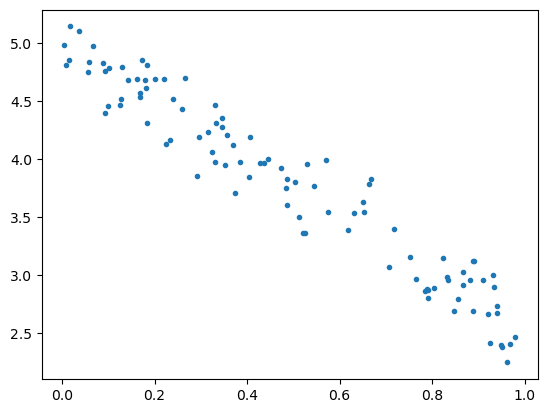

In [2]:
N = 100
x = np.random.rand(N+1)
noise = 0.2*np.random.randn(N+1)
y = 5 - 2.5*x + noise
plt.plot(x,y,'.')
plt.show()

In [3]:
A = np.column_stack([np.ones(N+1),x])
c = la.solve(A.T@A,A.T@y)
c

array([ 5.00214991, -2.47956473])

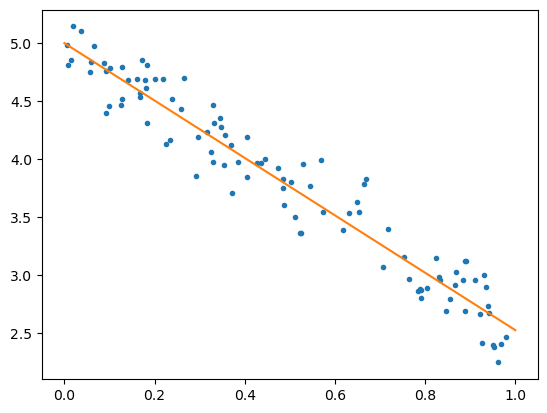

In [4]:
xs = np.linspace(0,1,10)
ys = c[0] + c[1]*xs
plt.plot(x,y,'.')
plt.plot(xs,ys)
plt.show()

## Tidal Data

In [5]:
import pandas as pd
data = pd.read_csv('tidal_data.csv')

In [6]:
data.head()

,Date,observations(m)
0,2022-06-07 12:54 PDT,2.94
1,2022-06-07 12:53 PDT,2.94
2,2022-06-07 12:52 PDT,2.95
3,2022-06-07 12:51 PDT,2.95
4,2022-06-07 12:50 PDT,2.95


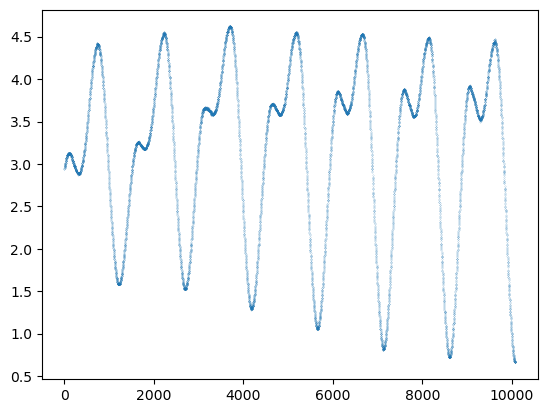

In [9]:
y = data['observations(m)'].values
plt.plot(y,'.',markersize=0.2)
plt.show()

Assume the model is of the form:

$$
f(x) = c_0 + c_1 \sin(a x) + c_2 \cos(a x) + c_3 \sin(b x) + c_4 \cos(b x)
$$

$$
a = \frac{2 \pi}{750} \ , \ \ b = \frac{2 \pi}{1500}
$$

In [10]:
N = len(y)
a = 2*np.pi/750
b = 2*np.pi/1500
x = np.arange(0,N)
A = np.column_stack([np.ones(N),np.sin(a*x),np.cos(a*x),np.sin(b*x),np.cos(b*x)])

In [11]:
c = la.solve(A.T@A,A.T@y)

In [12]:
f = lambda x: c[0] + c[1]*np.sin(a*x) + c[2]*np.cos(a*x) + c[3]*np.sin(b*x) + c[4]*np.cos(b*x)

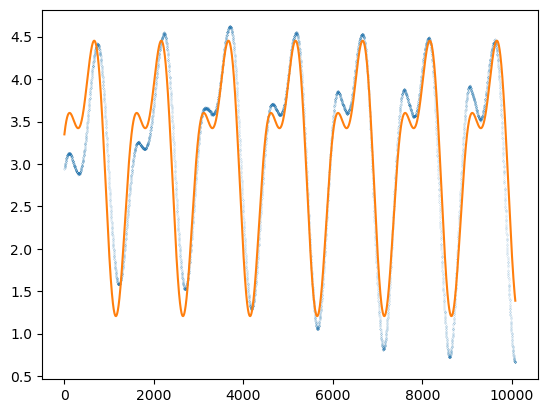

In [15]:
plt.plot(x,y,'.',markersize=0.1)
plt.plot(x,f(x))
plt.show()